<a href="https://colab.research.google.com/github/fsajad9/Power_flow/blob/main/IPM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:

import numpy as np
import matplotlib.pyplot as plt


In [62]:
m=100
n=2*m
I1=np.eye(m)
A=np.block([I1,I1])
ee=np.array([1 for i in range(m)])
b=2*ee
zv=np.zeros(m)
c=np.block([-ee,zv])
y=-2*ee
s=np.block([ee,2*ee])
x=np.block([ee,ee])
Z1=np.zeros((m,m))
Z2=np.zeros((2*m,m))
Z3=np.zeros((2*m,2*m))
ep=10**(-5)
I=np.eye(2*m)
mu=1
thet=0.9
gap=np.dot(c.T,x)-np.dot(b.T,y)
k=0
eee=np.array([1 for i in range(2*m)])
f1=[]

In [63]:
while gap>ep:
  k+=1
  mu=mu*(1-thet)
  #mu=np.dot(x.T,s)/4
  X=np.diag(x)
  S=np.diag(s)
  M=np.block([[A,Z1,Z2.T],[Z3,A.T,I],[S,Z2,X]])
  B=np.block([zv,zv,zv,mu*eee-x*s])
  sol=np.dot(np.linalg.inv(M),B.T)
  x=x+0.1*sol[0:2*m]
  y=y+0.1*sol[2*m:3*m]
  s=s+0.1*sol[3*m:]
  f1.append(gap)
  gap=np.dot(c.T,x)-np.dot(b.T,y)

  

In [64]:
gap

9.473204926280232e-06

Text(0, 0.5, 'Gap')

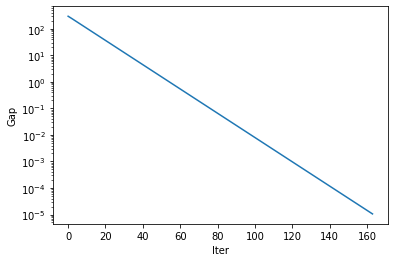

In [65]:
plt.plot(f1)
plt.yscale('log')
plt.xlabel('Iter')
plt.ylabel('Gap')

In [66]:
A=np.array([[1,0,1,0],[0,1,0,1]])
b=np.array([2,2])
c=np.array([-1,-1,0,0])
y=np.array([-2,-2])
s=np.array([1,1,2,2])
x=np.array([1,1,1,1])
I=np.eye(4)
Z1=np.zeros((2,2))
Z2=np.zeros((4,2))
Z3=np.zeros((4,4))
ep=10**(-5)
mu=1
thet=0.9
gap=np.dot(c.T,x)-np.dot(b.T,y)
k=0

In [67]:
while gap>ep:
  k+=1
  mu=mu*(1-thet)
  #mu=np.dot(x.T,s)/4
  X=np.diag(x)
  S=np.diag(s)
  M=np.block([[A,Z1,Z2.T],[Z3,A.T,I],[S,Z2,X]])
  B=np.block([0,0,0,0,0,0,mu-x[0]*s[0],mu-x[1]*s[1],mu-x[2]*s[2],mu-x[3]*s[3]])
  sol=np.dot(np.linalg.inv(M),B.T)
  x=x+0.2*sol[0:4]
  y=y+0.2*sol[4:6]
  s=s+0.2*sol[6:10]
  gap=np.dot(c.T,x)-np.dot(b.T,y)





In [68]:
mu

9.999999999999863e-61

In [69]:
k

60